<a href="https://www.kaggle.com/code/sayedul45/graduate-admission-using-ml?scriptVersionId=175484018" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Load Datasets

In [2]:
train=pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')
test=pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict.csv')

In [3]:
print(f'Train size : {train.shape[0]}')
print(f'Test size : {test.shape[0]}')

Train size : 500
Test size : 400


# Helper Function

**Func: Show the data**

In [4]:
def show_the_data(data):
    data.info()
    print(f'\n\n The columns are : {data.columns}')
    print(f'\n\n Actual Data : {data.head()}')

**Func: Categorize**

In [5]:
def categorize(data,col):
    numerical,categorical=[],[]
    for i in col:
        if data[i].dtype=='O':
            categorical.append(i)
        else:
            numerical.append(i)
    print(f'\n\nNumerical Features are : {numerical}')
    print(f'\n\nCategorical Features are : {categorical}')
    return numerical , categorical

**Func: get_correlated**

In [6]:
def get_correlated(data):
    cor=data.corr()
    correlated=set()
    for i in cor.columns:
        for j in cor.columns:
            if cor[i][j]>0.8 and i!=j:
                correlated.add(i)
                correlated.add(j)
    print(f'Highly Correlated features are : {list(correlated)}')
    return list(correlated)

In [7]:
show_the_data(train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


 The columns are : Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


 Actual Data :    Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118          

In [8]:
show_the_data(test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


 The columns are : Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


 Actual Data :    Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118          

In [9]:
numerical,categorical=categorize(train,train.columns)

print(f'\nThere are {len(numerical)} columns are present on training data ')
print(f'There are {len(categorical)} columns are present of training data')



Numerical Features are : ['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']


Categorical Features are : []

There are 9 columns are present on training data 
There are 0 columns are present of training data


In [10]:
numerical,categorical=categorize(test,test.columns)

print(f'There are {len(numerical)} columns are present on testing data')
print(f'There are {len(categorical)} columns are present on testing data')



Numerical Features are : ['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']


Categorical Features are : []
There are 9 columns are present on testing data
There are 0 columns are present on testing data


In [11]:
correlated_features=get_correlated(train)


Highly Correlated features are : ['TOEFL Score', 'Chance of Admit ', 'CGPA', 'GRE Score']


# Let's Check for missing values

In [12]:
train.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [13]:
test.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

<Axes: >

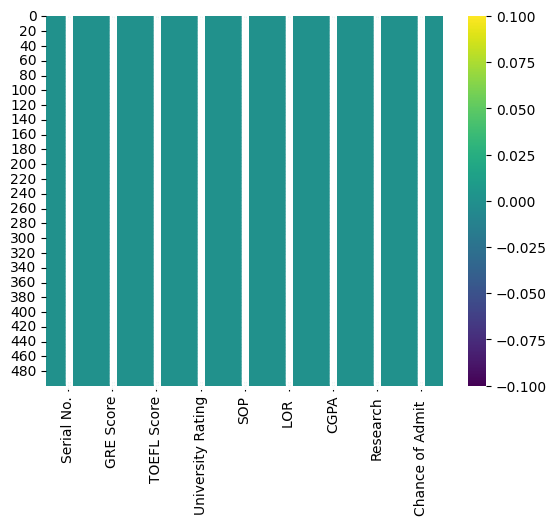

In [14]:
sns.heatmap(train.isna(),cmap='viridis',annot=True)

# Visualize the target feature's Distribution

<Axes: >

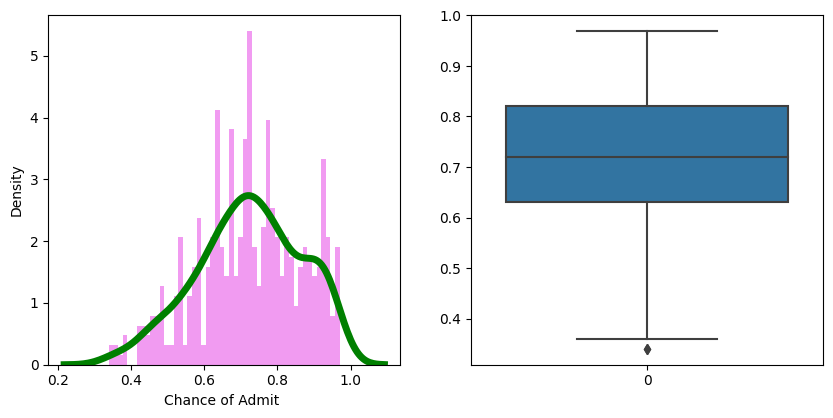

In [15]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
#train['Chance of Admit '].hist()
sns.distplot(train['Chance of Admit '],bins=50,color='Violet',  kde_kws={"color": "g", "lw": 5, "label": "KDE"},hist_kws={"linewidth": 5,"alpha": 0.8 })
plt.subplot(2,2,2)
sns.boxplot(train['Chance of Admit '])

In [16]:
'Chance of Admit ' in train.columns

True

In [17]:
if len(correlated_features)==len(train.columns):
    print('All of the features are existing on train dataset are highly corrleated')
else:
    print('There are some columns which is highly correlated')

There are some columns which is highly correlated


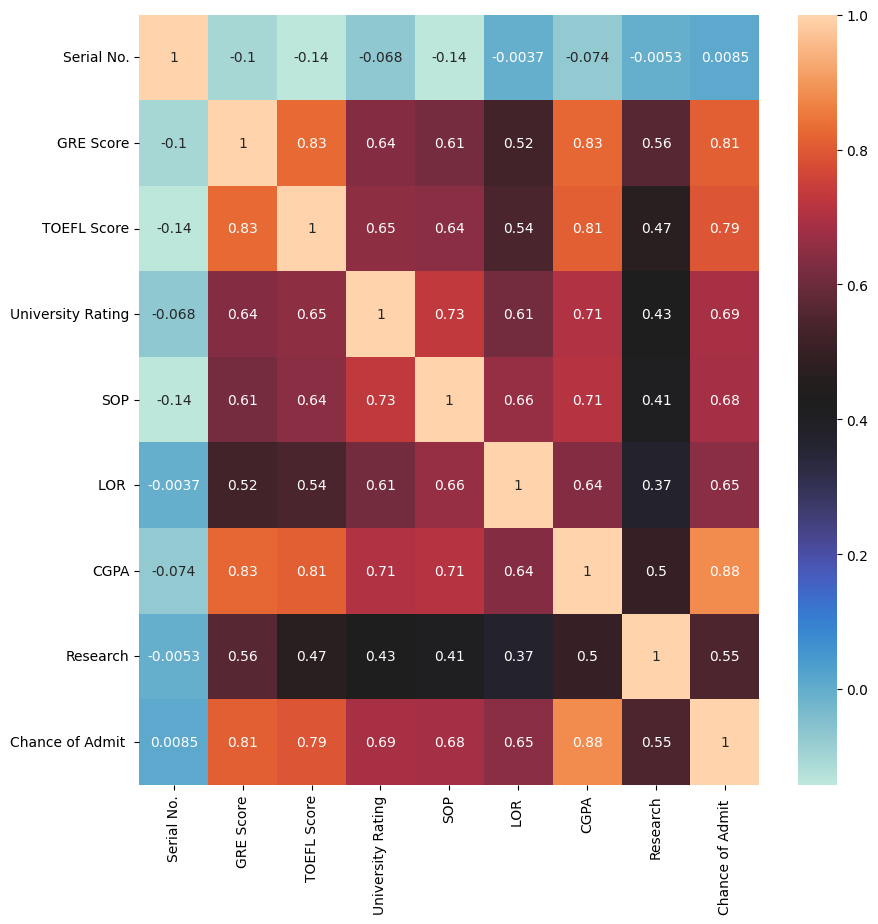

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),annot=True,cmap='icefire')
plt.show()

In [19]:
data=train[correlated_features]
test_data=test[correlated_features]

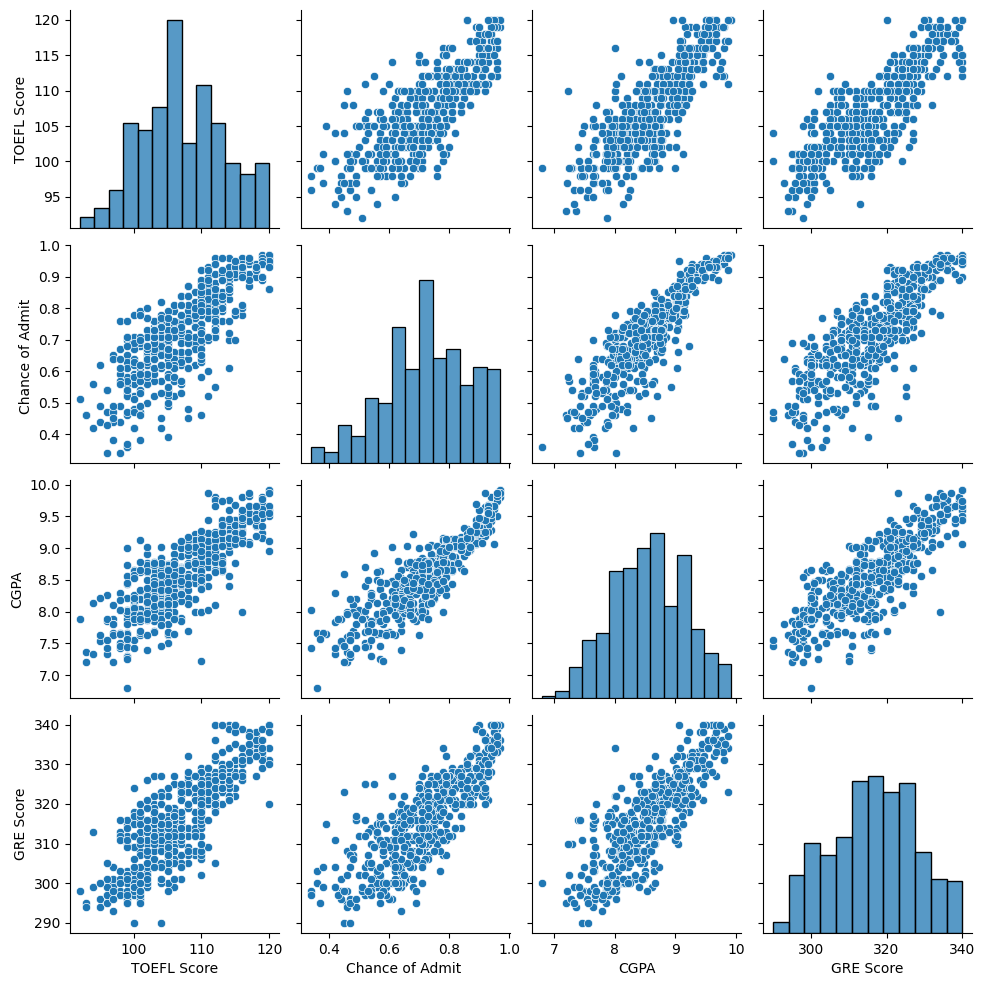

In [20]:
sns.pairplot(data)

In [21]:
data.describe()

,TOEFL Score,Chance of Admit,CGPA,GRE Score
count,500.000000,500.00000,500.000000,500.000000
mean,107.192000,0.72174,8.576440,316.472000
std,6.081868,0.14114,0.604813,11.295148
min,92.000000,0.34000,6.800000,290.000000
25%,103.000000,0.63000,8.127500,308.000000
50%,107.000000,0.72000,8.560000,317.000000
75%,112.000000,0.82000,9.040000,325.000000
max,120.000000,0.97000,9.920000,340.000000


# Outlier Detection Using Z Score

In [22]:
def outlier(data):
    outlier=[]
    for col in data.columns:
        suspect=[]
        mean=data[col].mean()
        std=data[col].std()
        for i in data[col]:
            z=(i-mean)/std
            if z>2:
                suspect.append(i)
        outlier.append(list(suspect))
        print(f'There are {len(suspect)} in {col} feature')
    return outlier
        
            
    

In [23]:
out=outlier(data)

There are 9 in TOEFL Score feature
There are 0 in Chance of Admit  feature
There are 9 in CGPA feature
There are 9 in GRE Score feature


To delete the outliers at the very earlier we replace them with np.nan and later on we use dropna to remove them

In [24]:
out

[[120, 120, 120, 120, 120, 120, 120, 120, 120],
 [],
 [9.8, 9.8, 9.92, 9.8, 9.91, 9.87, 9.82, 9.86, 9.87],
 [340, 340, 340, 340, 340, 340, 340, 340, 340]]

In [25]:
j=0
columns=data.columns
for i in out:
    for val in data[columns[j]]:
        if val in i:
            data[columns[j]]=data[columns[j]].replace(val,np.nan)
    j+=1

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TOEFL Score       491 non-null    float64
 1   Chance of Admit   500 non-null    float64
 2   CGPA              491 non-null    float64
 3   GRE Score         491 non-null    float64
dtypes: float64(4)
memory usage: 15.8 KB


In [27]:
data.dropna(axis=0,inplace=True)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 0 to 499
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TOEFL Score       480 non-null    float64
 1   Chance of Admit   480 non-null    float64
 2   CGPA              480 non-null    float64
 3   GRE Score         480 non-null    float64
dtypes: float64(4)
memory usage: 18.8 KB


# Let's Visualize the data

In [29]:
fig = px.density_contour(data,x='CGPA',y='Chance of Admit ')
fig.show()

<Figure size 1000x1000 with 0 Axes>

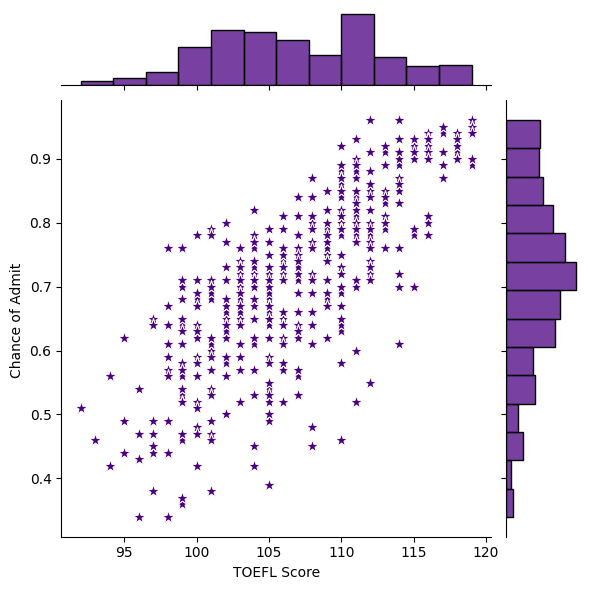

In [30]:
plt.figure(figsize=(10,10))
sns.jointplot(data,x='TOEFL Score',y='Chance of Admit ',color='Indigo',marker='*',s=100)
plt.show()

In [31]:
fig =px.scatter(data,x='GRE Score',y='Chance of Admit ',marginal_x='histogram',marginal_y='box')
fig.show()

# 3D visualization  of GRE Score , CGPA and TOEFL Score

In [32]:
fig=px.scatter_3d(data,x='CGPA',y='GRE Score',z='TOEFL Score',hover_name='Chance of Admit ')
fig.show()

# Let's Separately Analysis CGPA,GRE,TOEFL Score

In [33]:
toppers = data[data['CGPA']>9.5].sort_values(by='CGPA',ascending=False)
toppers.head(12)

,TOEFL Score,Chance of Admit,CGPA,GRE Score
213,119.0,0.96,9.78,333.0
71,112.0,0.96,9.76,336.0
130,114.0,0.96,9.76,339.0
23,119.0,0.95,9.70,334.0
47,119.0,0.89,9.70,339.0
253,115.0,0.93,9.68,335.0
446,118.0,0.93,9.67,327.0
399,117.0,0.95,9.66,333.0
0,118.0,0.92,9.65,337.0
70,118.0,0.94,9.64,332.0


In [34]:
print(f'There are {len(toppers)} university toppers')

There are 16 university toppers


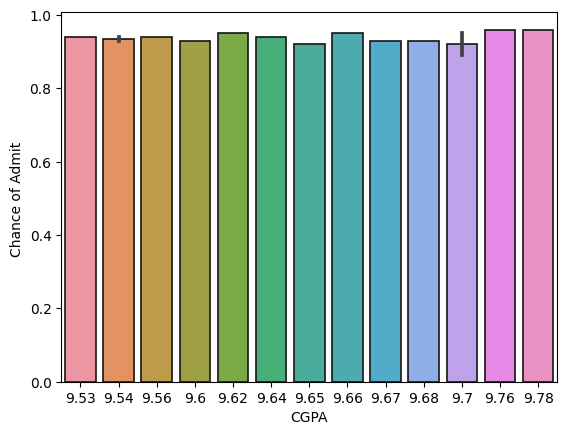

In [35]:
sns.barplot(data=toppers,x='CGPA',y='Chance of Admit ',linewidth=1.23,edgecolor='0.1')
plt.show()



There are 46 university toppers available





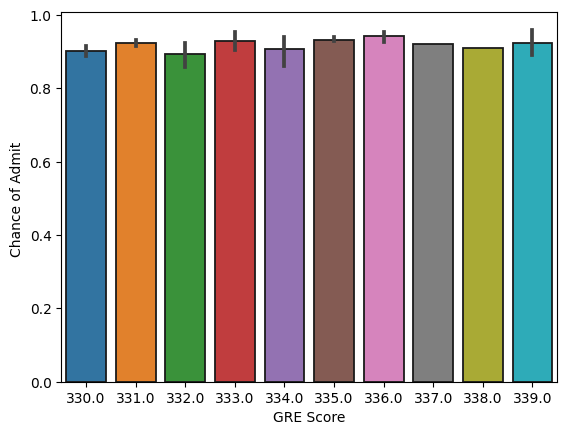

In [36]:
# Let's try the same thing for GRE Score 

GREToppers = data[data['GRE Score']>=330].sort_values(by='GRE Score',ascending=False)
print(f'\n\nThere are {len(GREToppers)} university toppers available')
print('\n\n')
sns.barplot(data=GREToppers,x='GRE Score',y='Chance of Admit ',linewidth=1.3,edgecolor='0.1')
plt.show()



There are 49 university toppers available





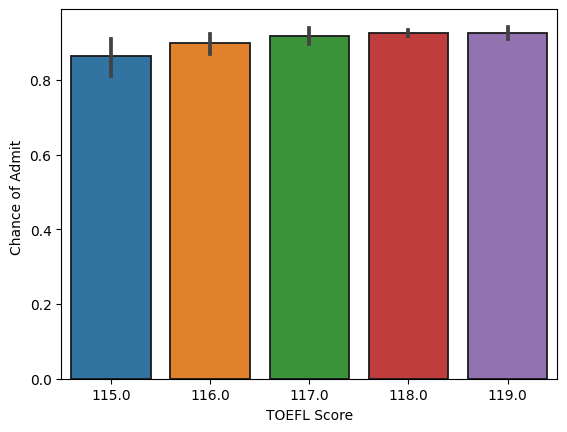

In [37]:
TOEFLToppers = data[data['TOEFL Score']>=115].sort_values(by='TOEFL Score',ascending=False)
print(f'\n\nThere are {len(TOEFLToppers)} university toppers available')
print('\n\n')
sns.barplot(data=TOEFLToppers,x='TOEFL Score',y='Chance of Admit ',linewidth=1.3,edgecolor='0.1')
plt.show()

# Dividing the data into Dependent and Independent Variables

In [38]:
test_data

,TOEFL Score,Chance of Admit,CGPA,GRE Score
0,118,0.92,9.65,337
1,107,0.76,8.87,324
2,104,0.72,8.00,316
3,110,0.80,8.67,322
4,103,0.65,8.21,314
...,...,...,...,...
395,110,0.82,9.04,324
396,107,0.84,9.11,325
397,116,0.91,9.45,330
398,103,0.67,8.78,312


In [39]:
y=data['Chance of Admit ']
t_test=test_data['Chance of Admit ']

data.drop(['Chance of Admit '],axis=1,inplace=True)
test_data.drop(['Chance of Admit '],axis=1,inplace=True)

# Performing Standardization

In [40]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

data_ss=ss.fit_transform(data)
test_ss=ss.fit_transform(test_data)


# Building Some ML Model

In [41]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble import AdaBoostRegressor as ABR
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.svm import SVR
from sklearn.linear_model import Ridge as RR
from sklearn.linear_model import Lasso as LRR
from sklearn.metrics import accuracy_score,r2_score


In [42]:
key=['Linear Regression','Decision Tree Regression','Random Forest Regressor','Gradient Boosting Regressor','Ada Boosting Regressor','K-Neighbors Regressor','Support Vector Regressor','Ridge Regressor','Lasso Regressor']
value=[LR(),DTR(),RFR(),GBR(),ABR(),KNR(),SVR(),RR(),LRR()]
pred=[]
models = dict(zip(key,value))
print(models)

{'Linear Regression': LinearRegression(), 'Decision Tree Regression': DecisionTreeRegressor(), 'Random Forest Regressor': RandomForestRegressor(), 'Gradient Boosting Regressor': GradientBoostingRegressor(), 'Ada Boosting Regressor': AdaBoostRegressor(), 'K-Neighbors Regressor': KNeighborsRegressor(), 'Support Vector Regressor': SVR(), 'Ridge Regressor': Ridge(), 'Lasso Regressor': Lasso()}


In [43]:
models.items()

dict_items([('Linear Regression', LinearRegression()), ('Decision Tree Regression', DecisionTreeRegressor()), ('Random Forest Regressor', RandomForestRegressor()), ('Gradient Boosting Regressor', GradientBoostingRegressor()), ('Ada Boosting Regressor', AdaBoostRegressor()), ('K-Neighbors Regressor', KNeighborsRegressor()), ('Support Vector Regressor', SVR()), ('Ridge Regressor', Ridge()), ('Lasso Regressor', Lasso())])

In [44]:
models.values()

dict_values([LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), GradientBoostingRegressor(), AdaBoostRegressor(), KNeighborsRegressor(), SVR(), Ridge(), Lasso()])

In [45]:
models.keys()

dict_keys(['Linear Regression', 'Decision Tree Regression', 'Random Forest Regressor', 'Gradient Boosting Regressor', 'Ada Boosting Regressor', 'K-Neighbors Regressor', 'Support Vector Regressor', 'Ridge Regressor', 'Lasso Regressor'])

In [46]:

for name,algo in models.items():
    model=algo
    model.fit(data_ss,y)
    predictions=model.predict(test_ss)
    acc=r2_score(t_test,predictions)
    pred.append(acc)
    print(name,acc)

Linear Regression 0.7775488156748747
Decision Tree Regression 0.5471328271119167
Random Forest Regressor 0.7617502772981571
Gradient Boosting Regressor 0.7904390986225717
Ada Boosting Regressor 0.6836502869835295
K-Neighbors Regressor 0.8234699766384941
Support Vector Regressor 0.7037601282165618
Ridge Regressor 0.777484913312139
Lasso Regressor -0.006776679062794333


# Plotting the accuracy of each model

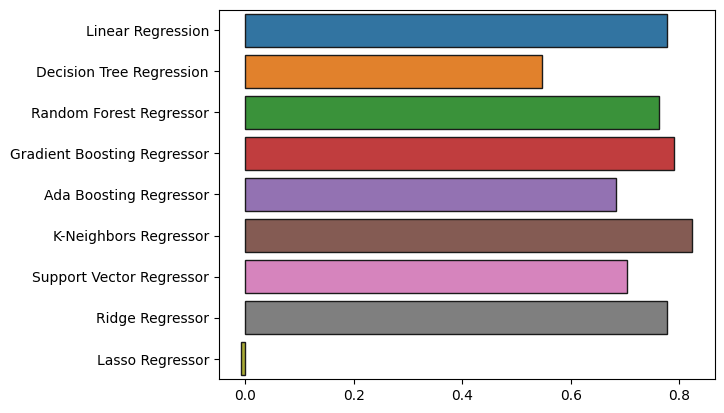

In [47]:
sns.barplot(x=pred,y=key,orient='h',edgecolor='0.1')
plt.show()

# HyperParameter Tuning

**Without hyperparameter tuning we found that KNeigobors Regression perform better.Let's perform hyperparameter tuning on it**

In [48]:
n_neighbors = list(np.arange(1,6))
weights = ['uniform','distance']
algorithm = ['auto','ball_tree','kd_tree','brute']
metric =['euclidean','manhattan','chebyshev','minkowski']
p =[1,2]
leaf_size = list(np.arange(20,200,40))
random_grid = {'n_neighbors':n_neighbors,'weights':weights,'p':p,'leaf_size':leaf_size,'algorithm':algorithm,'metric':metric}
print(random_grid)

{'n_neighbors': [1, 2, 3, 4, 5], 'weights': ['uniform', 'distance'], 'p': [1, 2], 'leaf_size': [20, 60, 100, 140, 180], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}


In [49]:
from sklearn.model_selection import RandomizedSearchCV
rf=KNR()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=3,random_state=42,n_jobs=-1)
rf_random.fit(data_ss,y)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3] END algorithm=ball_tree, leaf_size=60, metric=chebyshev, n_neighbors=2, p=2, weights=uniform;, score=0.615 total time=   0.0s
[CV 2/3] END algorithm=auto, leaf_size=180, metric=manhattan, n_neighbors=4, p=2, weights=uniform;, score=0.611 total time=   0.0s
[CV 3/3] END algorithm=auto, leaf_size=180, metric=manhattan, n_neighbors=4, p=2, weights=uniform;, score=0.759 total time=   0.0s
[CV 1/3] END algorithm=auto, leaf_size=100, metric=euclidean, n_neighbors=3, p=1, weights=uniform;, score=0.629 total time=   0.0s
[CV 2/3] END algorithm=auto, leaf_size=100, metric=euclidean, n_neighbors=3, p=1, weights=uniform;, score=0.581 total time=   0.0s
[CV 3/3] END algorithm=auto, leaf_size=100, metric=euclidean, n_neighbors=3, p=1, weights=uniform;, score=0.769 total time=   0.0s
[CV 1/3] END algorithm=auto, leaf_size=60, metric=chebyshev, n_neighbors=4, p=2, weights=distance;, score=0.639 total time=   0.0s
[CV 2/3] END alg

RandomizedSearchCV(cv=3, estimator=KNeighborsRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [20, 60, 100, 140, 180],
                                        'metric': ['euclidean', 'manhattan',
                                                   'chebyshev', 'minkowski'],
                                        'n_neighbors': [1, 2, 3, 4, 5],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, verbose=3)

In [50]:
rf_random.best_estimator_

KNeighborsRegressor(algorithm='kd_tree', leaf_size=100, metric='chebyshev')

In [51]:
rf_random.best_params_

{'weights': 'uniform',
 'p': 2,
 'n_neighbors': 5,
 'metric': 'chebyshev',
 'leaf_size': 100,
 'algorithm': 'kd_tree'}

In [52]:
rf_random.best_score_

0.6854283982332742

In [53]:
final = KNR(algorithm='kd_tree', leaf_size=60, metric='chebyshev',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                    weights='distance')
final.fit(data_ss,y)

KNeighborsRegressor(algorithm='kd_tree', leaf_size=60, metric='chebyshev', p=1,
                    weights='distance')

In [54]:
prediction=final.predict(test_ss)
score=r2_score(t_test,prediction)
score

0.8640209303909936

# Evaluating effect on  HyperParameter Tuning

In [55]:
def evaluate(model,test_features,test_labels):
    predictions=model.predict(test_features)
    errors=abs(predictions-test_labels)
    mape=100 * np.mean(errors/test_labels)
    accuracy=100-mape
    print('Model Performance')
    print(f'Average Errors : {np.mean(errors):.2f}')
    print(f'Accuracy : {accuracy:.3f}')
    return accuracy

In [56]:
base_model=KNR()
base_model.fit(data_ss,y)
base_accuracy=evaluate(base_model,test_ss,t_test)

Model Performance
Average Errors : 0.05
Accuracy : 93.010


In [57]:
best_model = final
best_accuracy = evaluate(best_model, test_ss, t_test)

Model Performance
Average Errors : 0.04
Accuracy : 94.002


In [58]:
imp=100*((best_accuracy-base_accuracy)/(base_accuracy))
print(f'Improvement of {imp:.2f}%')

Improvement of 1.07%


In [59]:
final = best_model
pred = final.predict(test_ss)
pred[:20]

array([0.93860621, 0.79536868, 0.65740999, 0.77039567, 0.61618068,
       0.85410423, 0.72008814, 0.60708776, 0.53521815, 0.68463619,
       0.65802767, 0.81319711, 0.80858277, 0.60008327, 0.6794249 ,
       0.5903761 , 0.68384994, 0.67493543, 0.72032613, 0.62914228])

Text(0.5, 0, 'Prediction level')

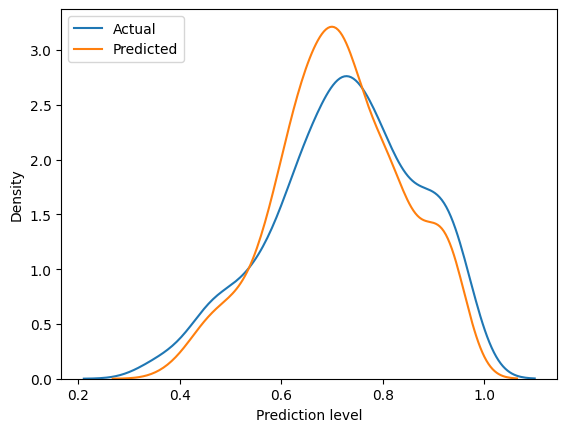

In [60]:
sns.distplot(t_test,hist=False,label = 'Actual')
sns.distplot(pred,hist=False, label ='Predicted')
plt.legend(loc="upper left")
plt.xlabel('Prediction level')